In [1]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

data5420


In [58]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. All changes under this directory will be kept even after reset. Please clean unnecessary files in time to speed up environment loading.
!ls /home/aistudio/work


# **Iris 鸢尾花数据集是一个经典数据集，在统计学习和机器学习领域都经常被用作示例。数据集内包含 3 类共 150 条记录，每类各 50 个数据，每条记录都有 4 项特征：花萼长度、花萼宽度、花瓣长度、花瓣宽度，可以通过这4个特征预测鸢尾花卉属于（iris-setosa, iris-versicolour, iris-virginica）中的哪一品种。
# 
# 据说在现实中，这三种花的基本判别依据其实是种子（因为花瓣非常容易枯萎）。**
# 本代码来自网页https://www.jianshu.com/p/52b86c774b0b

# 0 准备数据
  下面对 iris 进行探索性分析，首先导入相关包和数据集：

$\color{red}{学生任务：
请查找资料对引用的每个包的功能进行一句话的解释，形成注释写到每句代码后面}{red}$

In [1]:
# 导入相关包
import numpy as np # 提供数据包
import pandas as pd # 提供可不经过标记便可以放入数据的数据结构
from pandas import plotting # 导入绘图
from sklearn import datasets # 提供很多不同的数据集
import pandas as pd #
import numpy as np #
%matplotlib inline
import matplotlib.pyplot as plt # 提供绘图
plt.style.use('seaborn')

import seaborn as sns # 是一个基Fmatplotlib且数据结构与Pandas统一的统计图制作库
sns.set_style("whitegrid")

from sklearn.linear_model import LogisticRegression  # 逻辑回归
from sklearn.model_selection import train_test_split # 数据集划分
from sklearn.preprocessing import LabelEncoder # 用来解决分类和回归问题
from sklearn.neighbors import KNeighborsClassifier # 近邻西数
from sklearn import svm # 向量机
from sklearn import metrics  # 指标
from sklearn.tree import DecisionTreeClassifier # 决策树，随机森林

In [20]:

#*************将字符串转为整型，便于数据加载***********************
def iris_type(s):
    it = {b'Iris-setosa':0, b'Iris-versicolor':1, b'Iris-virginica':2}
    return it[s]
#加载数据
data_path='/home/aistudio/data/data5420/iris.data'          #数据文件的路径
data = np.loadtxt(data_path,                                #数据文件路径
                  dtype=float,                              #数据类型
                  delimiter=',',                            #数据分隔符
                  converters={4:iris_type})                 #将第5列使用函数iris_type进行转换
print(len(data))
print()

150



In [21]:
#加载数据
data_path='/home/aistudio/data/data5420/iris.data'          #数据文件的路径
iris = pd.read_csv(data_path,header=None)                     #读数据
iris.columns = ['SepalLengthCm','SepalwidthCm','PetalLengthCm','PetalWidthCm','Species']                                       #确定列名
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalwidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


$\color{red}{学生任务：
请给出iris内存占用的计算方法}$

In [22]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalwidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [23]:
iris.head()

,SepalLengthCm,SepalwidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 1 探索性分析
  先查看数据集各特征列的摘要统计信息：

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

In [24]:
iris.describe()

,SepalLengthCm,SepalwidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


通过Violinplot 和 Pointplot，分别从数据分布和斜率，观察各特征与品种之间的关系：

In [25]:
# 设置颜色主题
antV = ['#1890FF', '#2FC25B', '#FACC14', '#223273', '#8543E0', '#13C2C2', '#3436c7', '#F04864'] 

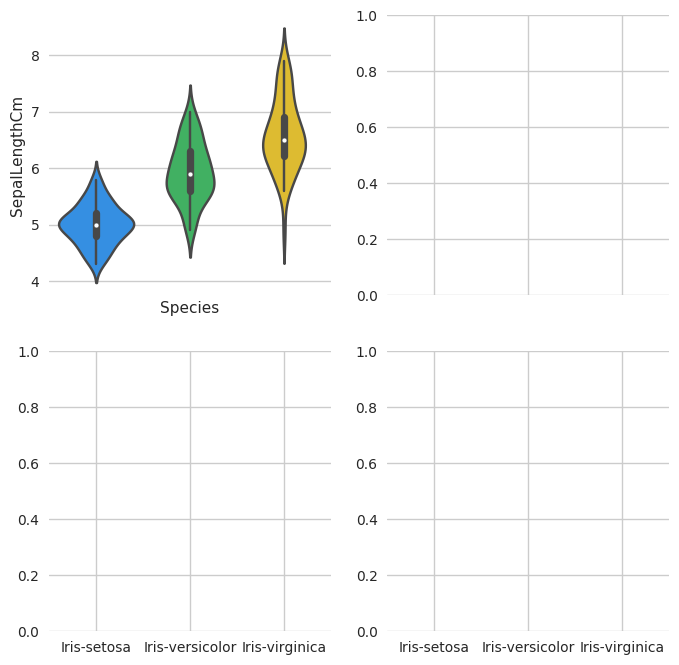

In [26]:
# 绘制  Violinplot
f, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
sns.despine(left=True)
#下面需要连续四句，分别画出横坐标为种类，纵坐标为四个特征的小提琴图
sns.violinplot(x='Species', y='SepalLengthCm', data=iris, palette=antV, ax=axes[0, 0])


plt.show()

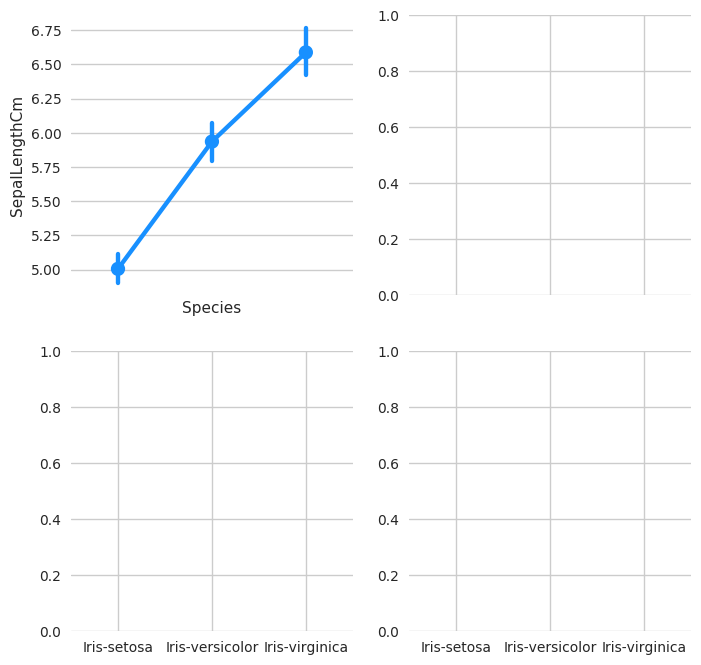

In [27]:
# 绘制  pointplot
f, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
sns.despine(left=True)
#下面需要连续四句，分别画出横坐标为种类，纵坐标为四个特征的点线图
sns.pointplot(x='Species', y='SepalLengthCm', data=iris, color=antV[0], ax=axes[0, 0])


plt.show()

生成各特征之间关系的矩阵图(交汇图)：

In [28]:
画出四个特征的与类别交汇图，参考约会数据预测中的交汇图



SyntaxError: invalid character in identifier (1779545587.py, line 1)

使用 Andrews Curves 将每个多变量观测值转换为曲线并表示傅立叶级数的系数，这对于检测时间序列数据中的异常值很有用。

Andrews Curves 是一种通过将每个观察映射到函数来可视化多维数据的方法。


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/pyplot.py:969: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)


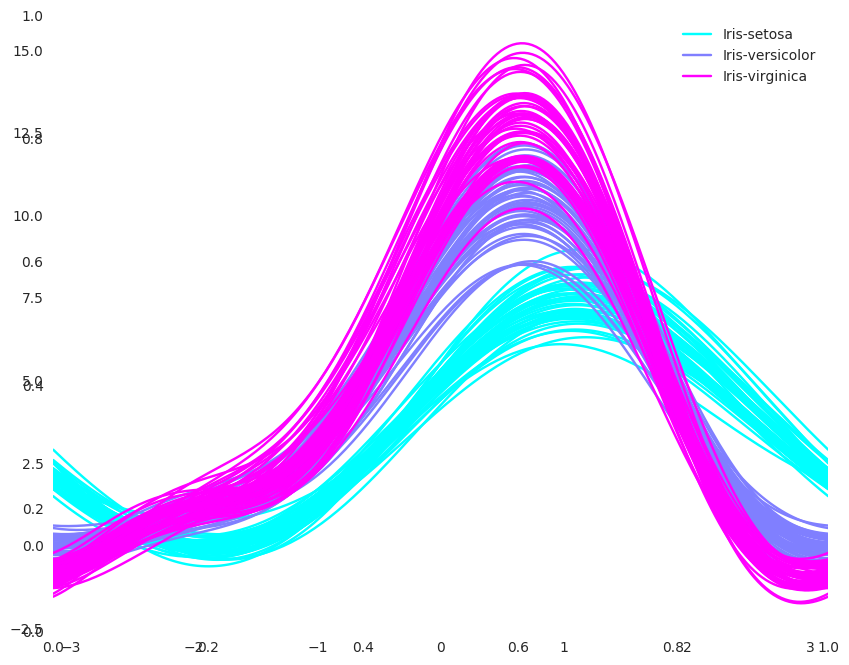

In [29]:
plt.subplots(figsize = (10,8))
plotting.andrews_curves(iris, 'Species', colormap='cool')

plt.show()

下面分别基于花萼和花瓣做线性回归的可视化：

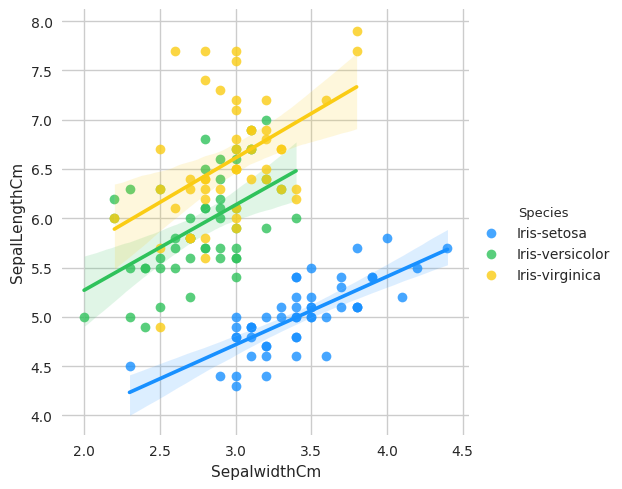

In [33]:
g = sns.lmplot(data=iris, x='SepalwidthCm', y='SepalLengthCm', palette=antV, hue='Species')

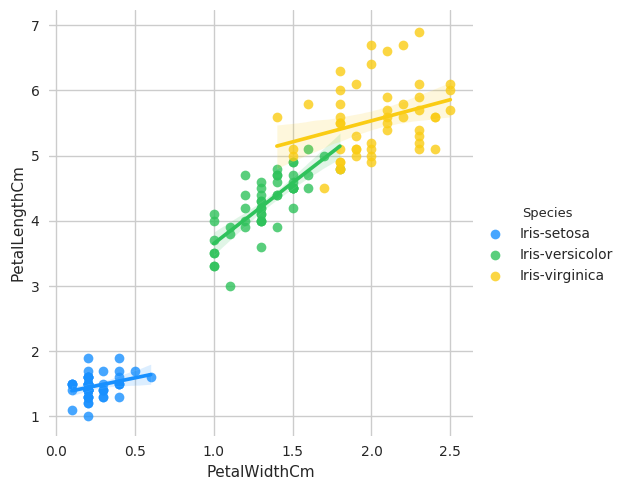

In [31]:
g = sns.lmplot(data=iris, x='PetalWidthCm', y='PetalLengthCm', palette=antV, hue='Species')

最后，通过热图找出数据集中不同特征之间的相关性，高正值或负值表明特征具有高度相关性：

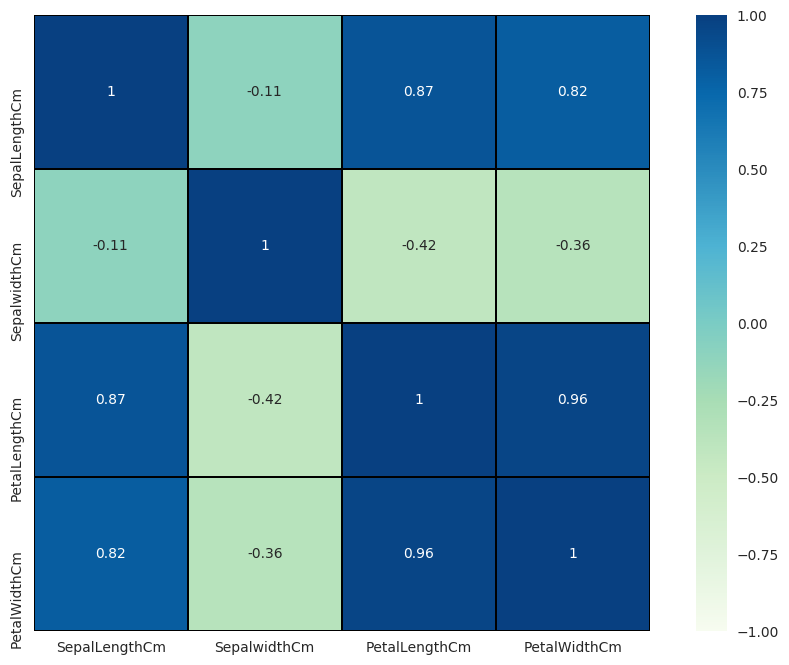

In [34]:
fig=plt.gcf()
fig.set_size_inches(12, 8)
fig=sns.heatmap(iris.corr(), annot=True, cmap='GnBu', linewidths=1, linecolor='k', square=True, mask=False, vmin=-1, vmax=1, cbar_kws={"orientation": "vertical"}, cbar=True)

# 2 机器学习
  接下来，通过机器学习，以花萼和花瓣的尺寸为根据，预测其品种。

  在进行机器学习之前，将数据集拆分为训练和测试数据集。首先，使用标签编码将 3 种鸢尾花的品种名称转换为分类值（0, 1, 2）。


In [36]:
# 载入特征和标签集
X = iris[['SepalLengthCm', 'SepalwidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

LabelEncoder：将离散型的数据转换成 000 到 n−1n-1n−1 之间的数


In [37]:
# 对标签集进行编码
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


接着，将数据集以 7: 3 的比例，拆分为训练数据和测试数据：

In [43]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=3/7, random_state=0)                                    #使用train_test_split对训练集和测试集划分
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(85, 4) (85,) (65, 4) (65,)


检查不同模型的准确性：

In [44]:
# Support Vector Machine
model = svm.SVC()
model.fit(train_X, train_y) # model训练
prediction = model.predict(test_X) # model预测
print('The accuracy of the SVM is: {0}'.format(metrics.accuracy_score(prediction,test_y)))

The accuracy of the SVM is: 0.9230769230769231


In [45]:
# Logistic Regression
model = LogisticRegression()
model.fit(train_X, train_y) # model训练
prediction = model.predict(test_X) # model预测

print('The accuracy of the Logistic Regression is: {0}'.format(metrics.accuracy_score(prediction,test_y)))

The accuracy of the Logistic Regression is: 0.9076923076923077


In [46]:
# Decision Tree
model = DecisionTreeClassifier()
model.fit(train_X, train_y) # model训练
prediction = model.predict(test_X) # model预测
print('The accuracy of the Decision Tree is: {0}'.format(metrics.accuracy_score(prediction,test_y)))

The accuracy of the Decision Tree is: 0.9538461538461539


In [49]:
# K-Nearest Neighbours
model = KNeighborsClassifier()
model.fit(train_X, train_y) # model训练
prediction = model.predict(test_X) # model预测
print('The accuracy of the KNN is: {0}'.format(metrics.accuracy_score(prediction,test_y)))

The accuracy of the KNN is: 0.9384615384615385


$\color{red}{总结与讨论：请同学们将几个算法的结果和讨论写到这里}$

上面使用了数据集的所有特征，下面将分别使用花瓣和花萼的尺寸：

In [53]:
#只使用花瓣
petal = iris[['PetalLengthCm', 'PetalWidthCm', 'Species']]
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0) 
train_x_p=train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p=test_p.Species

#只使用花萼
sepal = iris[['SepalLengthCm', 'SepalwidthCm', 'Species']]
train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0) 
train_x_s=train_s[['SepalwidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalwidthCm','SepalLengthCm']]
test_y_s=test_s.Species




In [54]:
model=svm.SVC()

model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is: {0}'.format(metrics.accuracy_score(prediction,test_y_p)))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is: {0}'.format(metrics.accuracy_score(prediction,test_y_s)))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


In [55]:
model = LogisticRegression()

model.fit(train_x_p, train_y_p) 
prediction = model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is: {0}'.format(metrics.accuracy_score(prediction,test_y_p)))


print('The accuracy of the Logistic Regression using Sepals is: {0}'.format(metrics.accuracy_score(prediction,test_y_s)))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.9777777777777777


In [56]:
model=DecisionTreeClassifier()

model.fit(train_x_p, train_y_p) 
prediction = model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is: {0}'.format(metrics.accuracy_score(prediction,test_y_p)))

model.fit(train_x_s, train_y_s) 
prediction = model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is: {0}'.format(metrics.accuracy_score(prediction,test_y_s)))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6444444444444445


In [57]:
model=KNeighborsClassifier(n_neighbors=3) 

model.fit(train_x_p, train_y_p) 
prediction = model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is: {0}'.format(metrics.accuracy_score(prediction,test_y_p)))

model.fit(train_x_s, train_y_s) 
prediction = model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is: {0}'.format(metrics.accuracy_score(prediction,test_y_s)))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


从中不难看出，使用花瓣的尺寸来训练数据较花萼更准确。正如在探索性分析的热图中所看到的那样，花萼的宽度和长度之间的相关性非常低，而花瓣的宽度和长度之间的相关性非常高。